In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv("./datasets/titanic_toy.csv")

In [4]:
df.sample(5)

,Age,Fare,Family,Survived
514,24.0,7.4958,0,0
228,18.0,13.0000,0,0
9,14.0,30.0708,1,1
498,25.0,151.5500,3,0
639,NaN,16.1000,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

"Age" --> float64

"Fare"--> float64

In [7]:
df.duplicated().sum()

129

In [8]:
df.shape

(891, 4)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(762, 4)

In [14]:
df.isnull().mean()*100

Age         12.467192
Fare         5.249344
Family       0.000000
Survived     0.000000
dtype: float64

### We can fill "Fare" with the mean or median, but "Age"  we can't fill with the mean and median because if we will fill it by the mean or median then it change the distribution of the data. 

In [17]:
X_train, X_test, y_train, y_test=train_test_split(df.iloc[:,0:3],df.iloc[:,3:4])

In [18]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((571, 3), (191, 3), (571, 1), (191, 1))

In [20]:
X_train.isnull().mean()*100

Age       11.733800
Fare       5.429072
Family     0.000000
dtype: float64

In [21]:
Age_mean=X_train["Age"].mean()
Fare_mean=X_train["Fare"].mean()
Age_median=X_train["Age"].median()
Fare_median=X_train["Fare"].median()

In [22]:
print(Age_mean)
print(Fare_mean)
print(Age_median)
print(Fare_median)

30.351190476190474
36.14334111111107
29.0
18.0


In [24]:
X_train["Age_mean"]=X_train["Age"].fillna(Age_mean)
X_train["Fare_mean"]=X_train["Fare"].fillna(Fare_mean)
X_train["Age_median"]=X_train["Age"].fillna(Age_median)
X_train["Fare_median"]=X_train["Fare"].fillna(Fare_median)

X_test["Age_mean"]=X_test["Age"].fillna(Age_mean)
X_test["Fare_mean"]=X_test["Fare"].fillna(Fare_mean)
X_test["Age_median"]=X_test["Age"].fillna(Age_median)
X_test["Fare_median"]=X_test["Fare"].fillna(Fare_median)

In [25]:
X_train.head()

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
237,8.0,26.2500,2,8.00000,26.2500,8.0,26.2500
839,NaN,29.7000,0,30.35119,29.7000,29.0,29.7000
244,30.0,7.2250,0,30.00000,7.2250,30.0,7.2250
275,63.0,77.9583,1,63.00000,77.9583,63.0,77.9583
492,55.0,30.5000,0,55.00000,30.5000,55.0,30.5000


In [26]:
X_train.describe()

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
count,504.000000,540.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,30.351190,36.143341,0.933450,30.351190,36.143341,30.192644,35.158326
std,14.979682,53.515591,1.442142,14.071784,52.039999,14.078513,52.202417
min,0.420000,0.000000,0.000000,0.420000,0.000000,0.420000,0.000000
25%,20.875000,8.050000,0.000000,22.000000,8.125000,22.000000,8.125000
50%,29.000000,18.000000,0.000000,30.351190,20.525000,29.000000,18.000000
75%,39.000000,36.813550,1.000000,37.000000,36.143341,37.000000,33.760400
max,80.000000,512.329200,7.000000,80.000000,512.329200,80.000000,512.329200


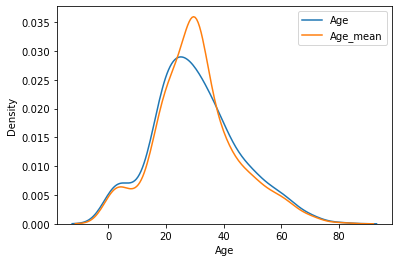

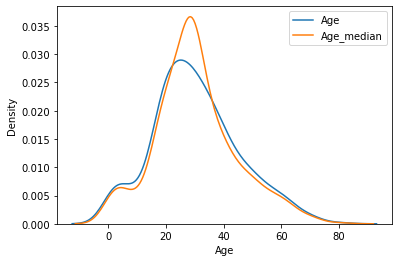

In [30]:
sns.kdeplot(X_train["Age"],label="Age")
sns.kdeplot(X_train["Age_mean"], label="Age_mean")
plt.legend()
plt.show()
sns.kdeplot(X_train["Age"],label="Age")
sns.kdeplot(X_train["Age_median"], label="Age_median")
plt.legend()
plt.show()

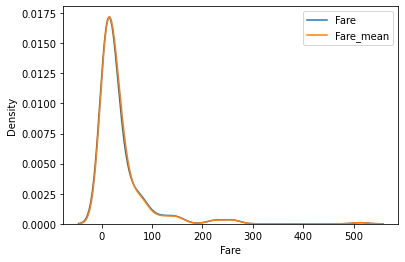

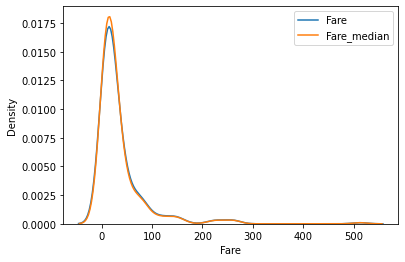

In [31]:
sns.kdeplot(X_train["Fare"],label="Fare")
sns.kdeplot(X_train["Fare_mean"], label="Fare_mean")
plt.legend()
plt.show()
sns.kdeplot(X_train["Fare"],label="Fare")
sns.kdeplot(X_train["Fare_median"], label="Fare_median")
plt.legend()
plt.show()

In [32]:
X_train.corr()

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
Age,1.000000,0.093247,-0.309927,1.000000,0.091072,1.000000,0.090298
Fare,0.093247,1.000000,0.186125,0.089191,1.000000,0.089388,1.000000
Family,-0.309927,0.186125,1.000000,-0.300978,0.183106,-0.296918,0.181664
Age_mean,1.000000,0.089191,-0.300978,1.000000,0.087115,0.999522,0.086366
Fare_mean,0.091072,1.000000,0.183106,0.087115,1.000000,0.087306,0.996889
Age_median,1.000000,0.089388,-0.296918,0.999522,0.087306,1.000000,0.086578
Fare_median,0.090298,1.000000,0.181664,0.086366,0.996889,0.086578,1.000000


In [33]:
X_train.cov()

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
Age,224.390884,76.395337,-6.921471,224.390884,72.291297,224.390884,71.893880
Fare,76.395337,2863.918429,14.532270,67.462936,2863.918429,67.642858,2863.918429
Family,-6.921471,14.532270,2.079774,-6.107895,13.741918,-6.028385,13.676250
Age_mean,224.390884,67.462936,-6.107895,198.015114,63.793899,198.015114,63.443196
Fare_mean,72.291297,2863.918429,13.741918,63.793899,2708.161462,63.964036,2708.161462
Age_median,224.390884,67.642858,-6.028385,198.015114,63.964036,198.204535,63.628925
Fare_median,71.893880,2863.918429,13.676250,63.443196,2708.161462,63.628925,2725.092322


## Outlier detection 

#### As we can see in the "Age" and "Age_mean" box plot number of the outlier become more.

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


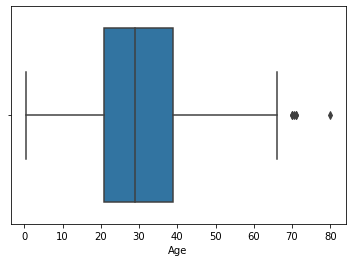

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


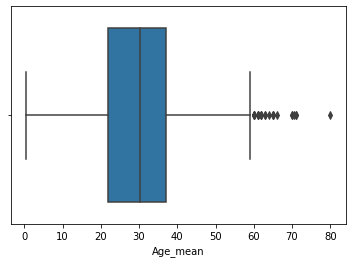

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


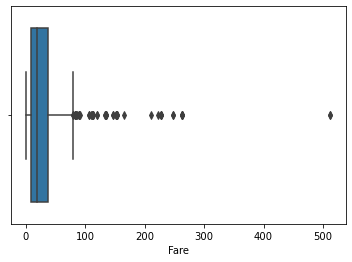

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


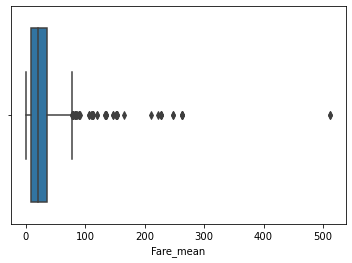

In [45]:
sns.boxplot(X_train["Age"])
plt.show()
sns.boxplot(X_train["Age_mean"])
plt.show()
sns.boxplot(X_train["Fare"])
plt.show()
sns.boxplot(X_train["Fare_mean"])
plt.show()


# Imputing using sklearn

In [69]:
X_train, X_test, y_train, y_test=train_test_split(df.iloc[:,0:3],df.iloc[:,3:4])

In [70]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((571, 3), (191, 3), (571, 1), (191, 1))

In [71]:
X_train.isnull().sum()

Age       67
Fare      27
Family     0
dtype: int64

In [72]:
X_test.isnull().sum()

Age       28
Fare      13
Family     0
dtype: int64

In [73]:
X_train.columns

Index(['Age', 'Fare', 'Family'], dtype='object')

In [74]:
trf1=ColumnTransformer(transformers=[
    ('age', SimpleImputer(strategy="mean") ,[0]),
    ('Fare', SimpleImputer(strategy="mean") ,[1])
    
],
remainder="passthrough")

In [75]:
trf1.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('age', SimpleImputer(), [0]),
                                ('Fare', SimpleImputer(), [1])])

In [76]:
X_train_transform=trf1.transform(X_train)
X_test_transform=trf1.transform(X_test)

In [77]:
X_train1=pd.DataFrame(X_train_transform, columns=X_train.columns)
X_test1=pd.DataFrame(X_test_transform, columns=X_test.columns)

In [78]:
X_train.isnull().sum()

Age       67
Fare      27
Family     0
dtype: int64

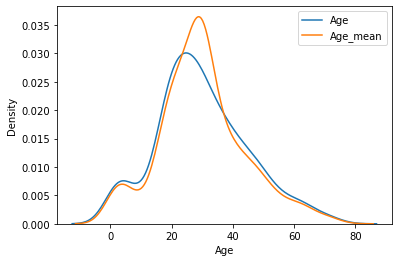

In [79]:
sns.kdeplot(X_train["Age"],label="Age")
sns.kdeplot(X_train1["Age"], label="Age_mean")
plt.legend()
plt.show()


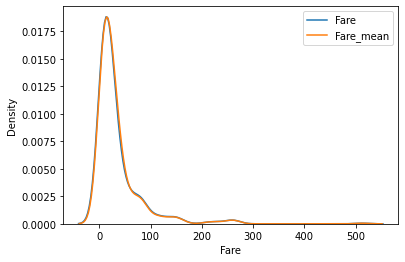

In [80]:
sns.kdeplot(X_train["Fare"],label="Fare")
sns.kdeplot(X_train1["Fare"], label="Fare_mean")
plt.legend()
plt.show()


/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


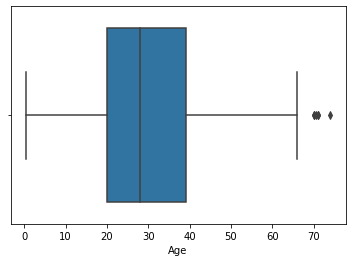

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


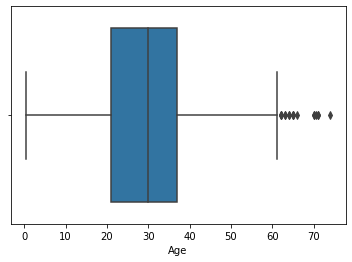

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


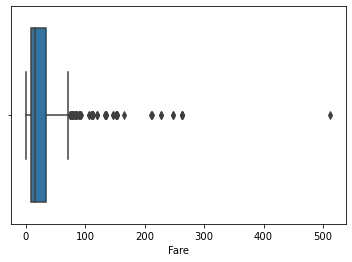

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


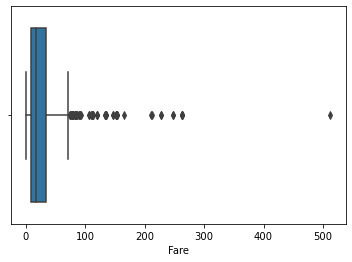

In [81]:
sns.boxplot(X_train["Age"])
plt.show()
sns.boxplot(X_train1["Age"])
plt.show()
sns.boxplot(X_train["Fare"])
plt.show()
sns.boxplot(X_train1["Fare"])
plt.show()